Importiamo le librerie Pandas e MatPlotLib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
%matplotlib notebook

Leggiamo i dati con pandas 

In [3]:
df=pd.read_csv('SALE-02from2017-10-01to2017-10-01_MC.csv')

In [4]:
df.describe()

Theta   TimeOfFlight    TrackLength
count  170320.000000  170320.000000  170320.000000
mean       23.833953       3.779397     112.499593
std        11.190236       0.649342      11.726097
min         0.027976       0.037202     100.000015
25%        15.219570       3.231432     103.634797
50%        23.418701       3.875148     108.976986
75%        31.898421       4.157991     117.787537
max        55.464694       7.081469     176.393616

Controlliamo i dati

In [5]:
df.head()

Theta  TimeOfFlight  TrackLength
0  23.982878      3.769326   109.449074
1  37.468912      4.288178   125.994804
2   1.631948      3.347349   100.040581
3  14.517341      3.146104   103.298119
4  31.117449      3.794802   116.807457

Introduciamo la colonna "velocità" come rapporto tra lunghezza di traccia e tempo di volo

In [6]:
df["velocita"]=df["TrackLength"]/df["TimeOfFlight"]

Prendiamo i dati con la lunghezza di traccia > 0

In [7]:
df_positivi=df[df["TimeOfFlight"]>0]

In [8]:
df_positivi

Theta  TimeOfFlight  TrackLength   velocita
0       23.982878      3.769326   109.449074  29.036776
1       37.468912      4.288178   125.994804  29.381897
2        1.631948      3.347349   100.040581  29.886510
3       14.517341      3.146104   103.298119  32.833663
4       31.117449      3.794802   116.807457  30.780910
...           ...           ...          ...        ...
170315  24.301623      4.236574   109.722321  25.898833
170316  24.738424      4.306394   110.104546  25.567690
170317  24.637134      4.270084   110.015099  25.764153
170318  22.389051      3.569186   108.152672  30.301775
170319  33.886970      3.696978   120.461739  32.583840

[170320 rows x 4 columns]

Rendiamo interi gli angoli così da creare le classi

In [9]:
df_positivi["Theta_int"]=df_positivi["Theta"].apply(int)

Controlo sulla congruità dei dati

In [10]:
df_positivi_filtrati= df_positivi[(df_positivi["TimeOfFlight"]<8) & (df_positivi["TrackLength"]<235) & (df_positivi["velocita"]<30)]


In [11]:
df_positivi_filtrati

Theta  TimeOfFlight  TrackLength   velocita  Theta_int
0       23.982878      3.769326   109.449074  29.036776         23
1       37.468912      4.288178   125.994804  29.381897         37
2        1.631948      3.347349   100.040581  29.886510          1
5       25.343934      3.984146   110.649506  27.772453         25
9       17.697500      4.154384   104.967621  25.266711         17
...           ...           ...          ...        ...        ...
170313  31.705379      4.112502   117.541718  28.581559         31
170314  23.511893      4.185123   109.053955  26.057527         23
170315  24.301623      4.236574   109.722321  25.898833         24
170316  24.738424      4.306394   110.104546  25.567690         24
170317  24.637134      4.270084   110.015099  25.764153         24

[90804 rows x 5 columns]

Rendiamo come index la colonna Theta-int

In [12]:
df_positivi_filtrati.set_index("Theta_int",inplace=True)

In [13]:
df_positivi_filtrati

Theta  TimeOfFlight  TrackLength   velocita
Theta_int                                                 
23         23.982878      3.769326   109.449074  29.036776
37         37.468912      4.288178   125.994804  29.381897
1           1.631948      3.347349   100.040581  29.886510
25         25.343934      3.984146   110.649506  27.772453
17         17.697500      4.154384   104.967621  25.266711
...              ...           ...          ...        ...
31         31.705379      4.112502   117.541718  28.581559
23         23.511893      4.185123   109.053955  26.057527
24         24.301623      4.236574   109.722321  25.898833
24         24.738424      4.306394   110.104546  25.567690
24         24.637134      4.270084   110.015099  25.764153

[90804 rows x 4 columns]

In [14]:
df_positivi_filtrati.describe()

Theta  TimeOfFlight   TrackLength      velocita
count  90804.000000  90804.000000  90804.000000  90804.000000
mean      24.317956      4.190340    112.674852     26.960499
std       10.692278      0.434087     11.399496      1.828860
min        0.034264      3.335648    100.000015     14.619111
25%       16.507565      3.918952    104.298971     25.628114
50%       24.177573      4.101389    109.615406     27.085473
75%       31.342395      4.327859    117.085846     28.452677
max       55.464694      7.081469    176.393616     29.999877

In funzione di theta calcoliamo la media delle velocità, dei tempi di volo e delle lunghezze di traccia 

In [15]:
v_theta=df_positivi_filtrati.groupby("Theta_int")["velocita"].mean()
tof_theta=df_positivi_filtrati.groupby("Theta_int")["TimeOfFlight"].mean()
tl_theta=df_positivi_filtrati.groupby("Theta_int")["TrackLength"].mean()

In [16]:
v_theta.head(100)

Theta_int
0     25.719772
1     25.653371
2     25.705991
3     25.662525
4     25.711336
5     25.731360
6     25.662743
7     25.682437
8     25.724210
9     25.807321
10    25.815936
11    25.902495
12    25.835421
13    25.898447
14    25.975670
15    26.036250
16    26.235141
17    26.270187
18    26.444948
19    26.507415
20    26.610492
21    26.800250
22    26.879192
23    27.049125
24    27.204549
25    27.378186
26    27.499579
27    27.663002
28    27.820709
29    27.991117
30    28.147337
31    28.255291
32    28.343125
33    28.282200
34    27.951071
35    27.572726
36    27.225939
37    26.745138
38    26.502000
39    26.480414
40    26.625029
41    26.773350
42    27.131295
43    27.439049
44    27.823350
45    28.102205
46    28.347964
47    28.562067
48    28.406951
49    27.858524
50    27.384786
51    27.414587
52    28.040006
53    28.093699
54    28.345751
55    28.098115
Name: velocita, dtype: float64

In [17]:
v_theta

Theta_int
0     25.719772
1     25.653371
2     25.705991
3     25.662525
4     25.711336
5     25.731360
6     25.662743
7     25.682437
8     25.724210
9     25.807321
10    25.815936
11    25.902495
12    25.835421
13    25.898447
14    25.975670
15    26.036250
16    26.235141
17    26.270187
18    26.444948
19    26.507415
20    26.610492
21    26.800250
22    26.879192
23    27.049125
24    27.204549
25    27.378186
26    27.499579
27    27.663002
28    27.820709
29    27.991117
30    28.147337
31    28.255291
32    28.343125
33    28.282200
34    27.951071
35    27.572726
36    27.225939
37    26.745138
38    26.502000
39    26.480414
40    26.625029
41    26.773350
42    27.131295
43    27.439049
44    27.823350
45    28.102205
46    28.347964
47    28.562067
48    28.406951
49    27.858524
50    27.384786
51    27.414587
52    28.040006
53    28.093699
54    28.345751
55    28.098115
Name: velocita, dtype: float64

Plottiamo le lunghezze di traccia

<IPython.core.display.Javascript object>


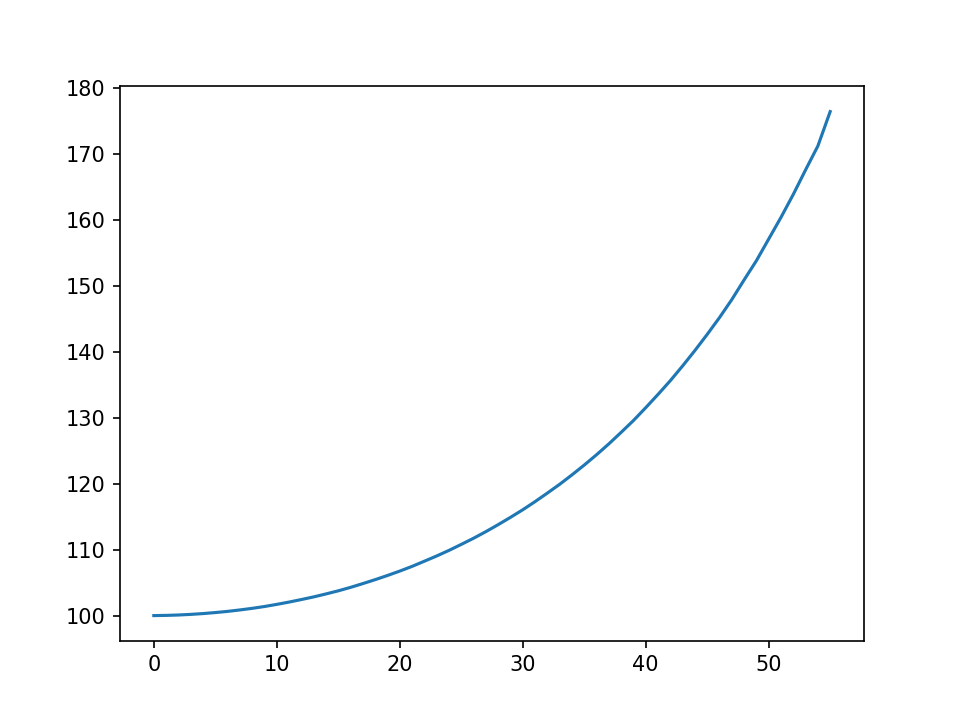

In [18]:
plt.figure()
plt.plot(tl_theta)
plt.title ="Track Length"

Plottiamo il tempo di volo

<IPython.core.display.Javascript object>


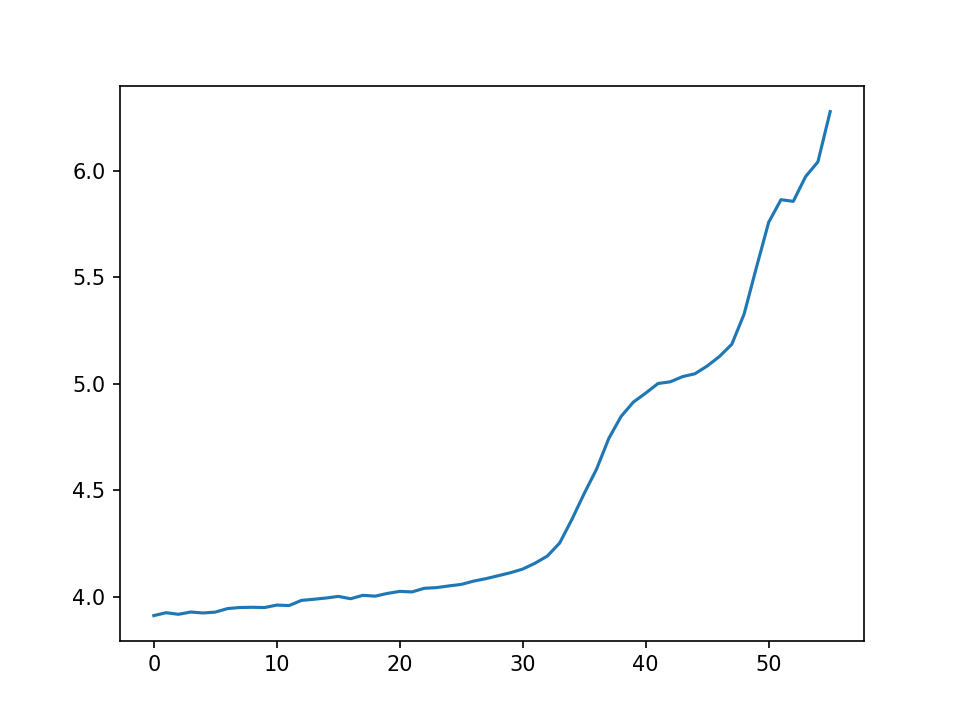

In [19]:
plt.figure()
plt.plot(tof_theta)
plt.title ="Time of Flight"

Plottiamo le velocità

<IPython.core.display.Javascript object>


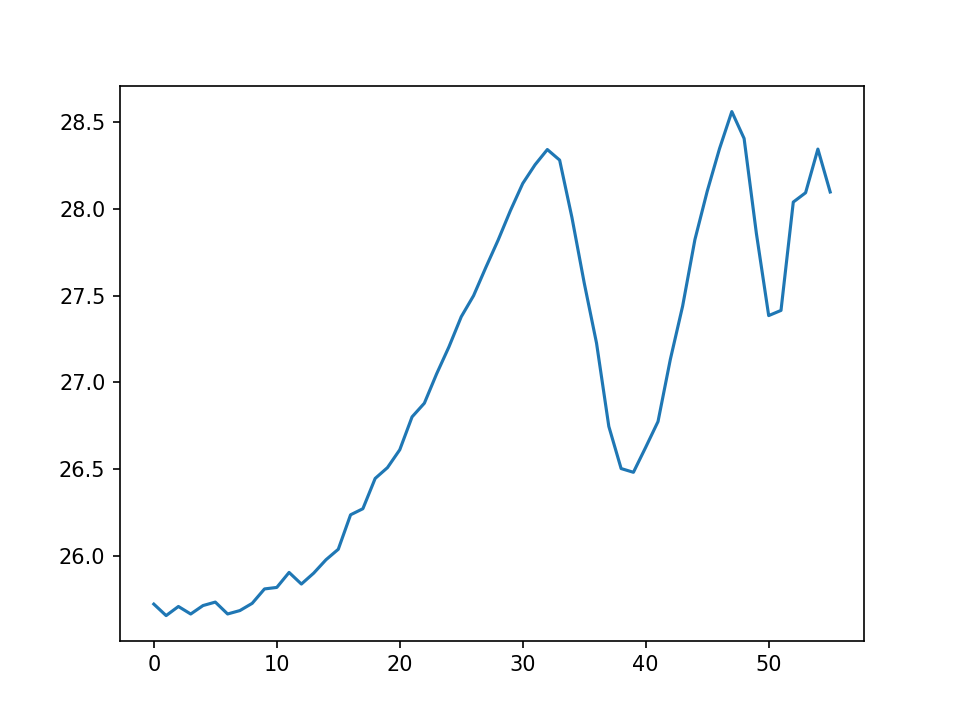

In [20]:
plt.figure()
plt.plot(v_theta)
plt.title ="velocità"